In [29]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import torch
from torch import nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
!pip install pymc-bart
!pip install preliz
!pip install ucimlrepo

In [31]:
import pymc_bart as pmb
import preliz as pz
from ucimlrepo import fetch_ucirepo

I am trying to find out different factors that affect the number of bikes rented from a bike share system. I want to find out the answer to this question because I believe that temporary decreases in rental prices could improve revenue and profit. I want to thank Justin for sharing the bike dataset with me. My predictors will be temperature, weekend, weekday, and humidity. My thought process is that all of these factors could be easily documented and used to determine that day's rental price easily without serious data collection.

In [32]:
bikes = fetch_ucirepo(id=275)
x = bikes.data.features
y = bikes.data.targets

In [33]:
x

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [34]:
y

,cnt
0,16
1,40
2,32
3,13
4,1
...,...
17374,119
17375,89
17376,90
17377,61


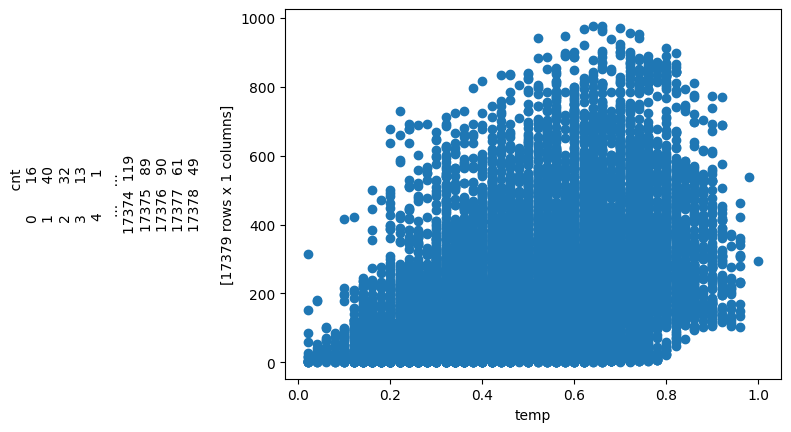

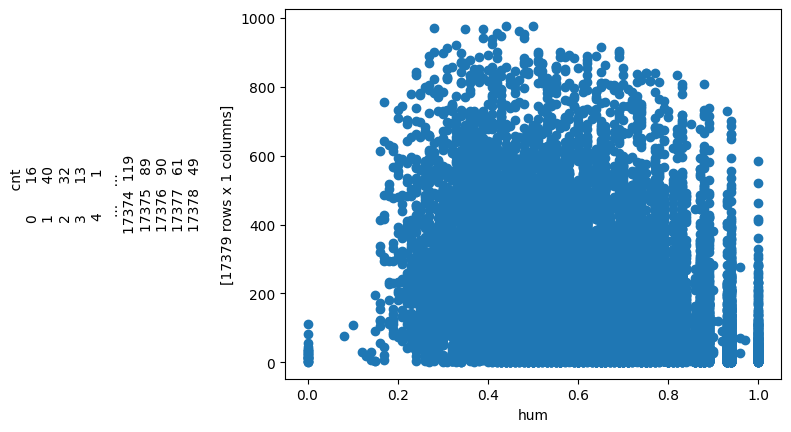

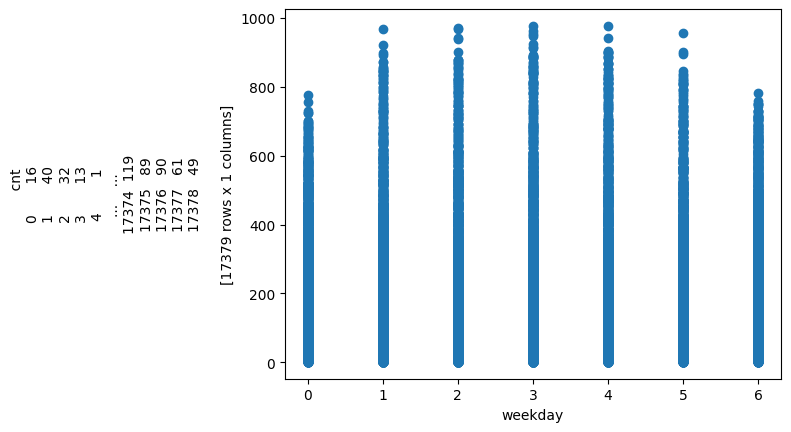

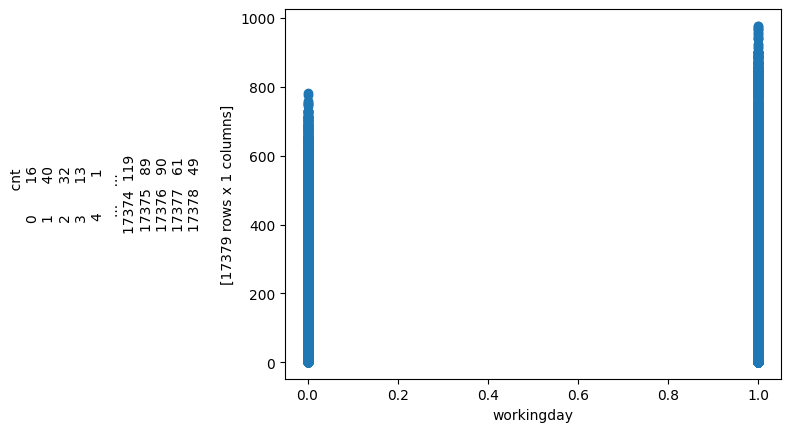

In [35]:
x_labels = ["temp", "hum", "weekday", "workingday"]
y_label = "cnt"
for a in x_labels:
  plt.scatter(x[a], y[y_label])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

After reviewing the graphs, it appears that every one of my predictors have little to no correlation with numbers of bikes rented. Because of this, I will go back to the data set and pick some new predictors that can be easily recorded.

After attempting to use a few predictors, I have decided to expand my search to all weather and day related predictors in the dataset.

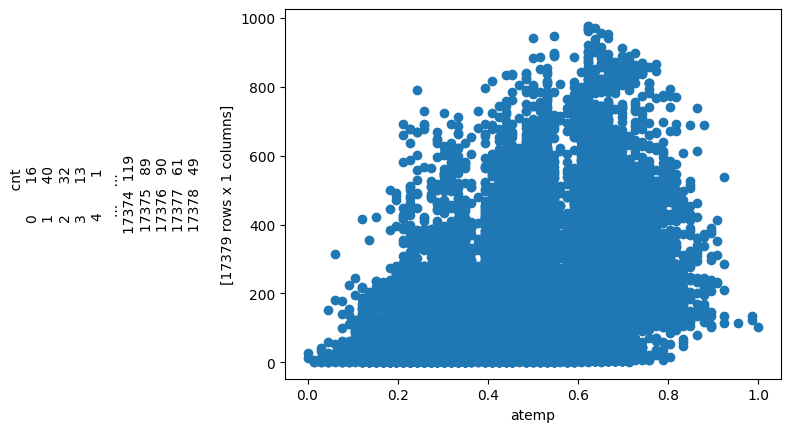

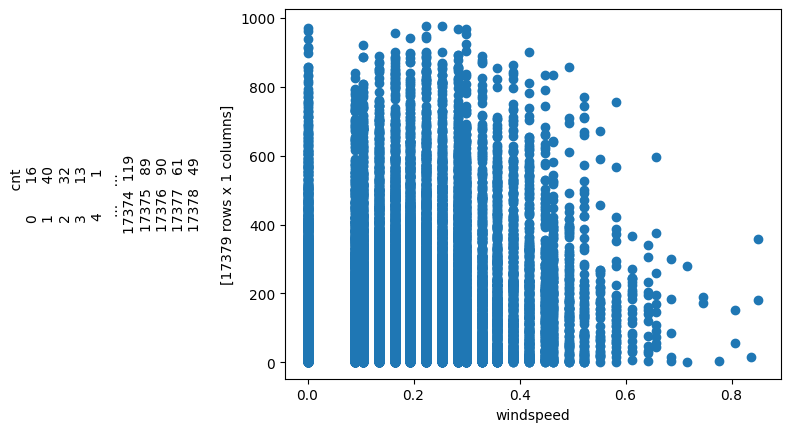

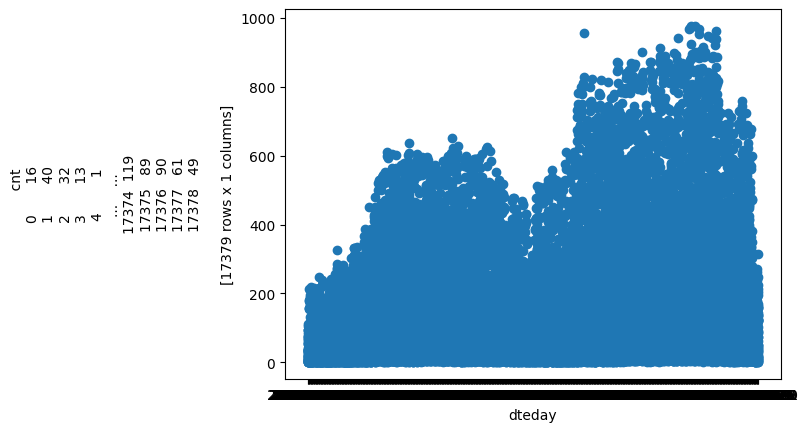

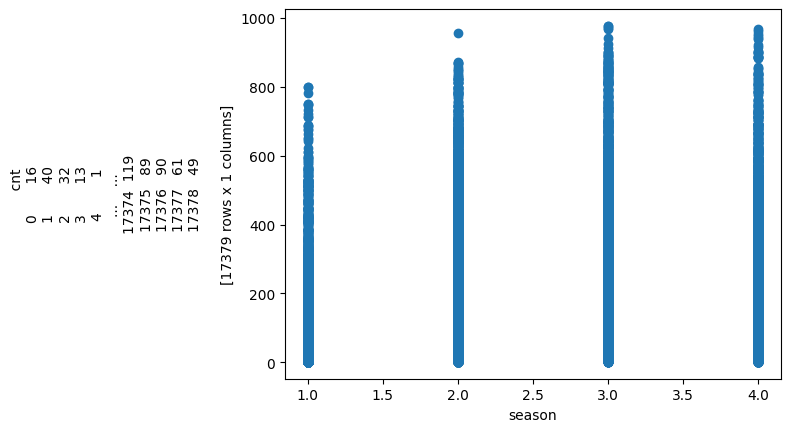

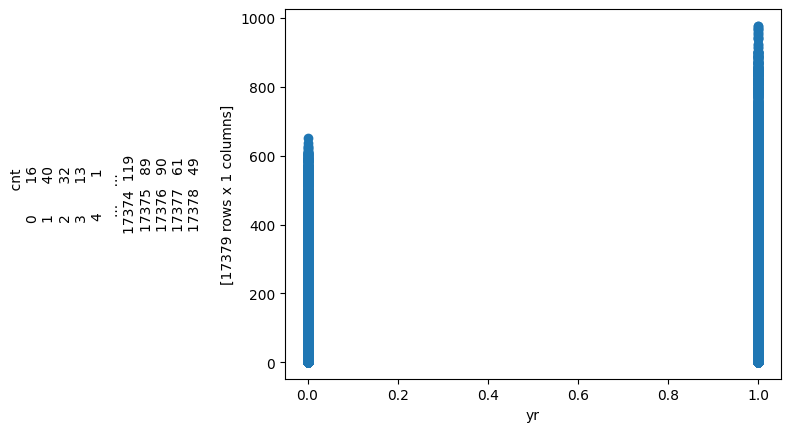

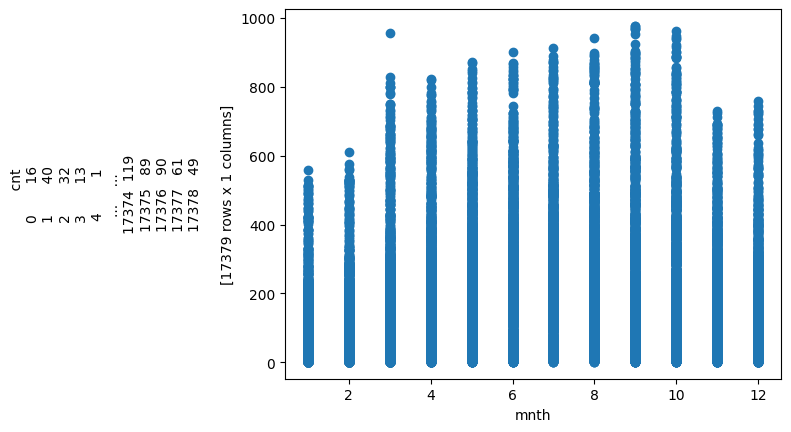

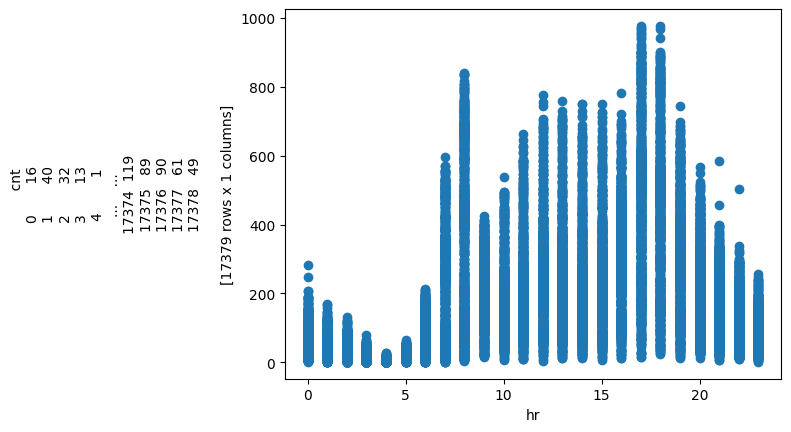

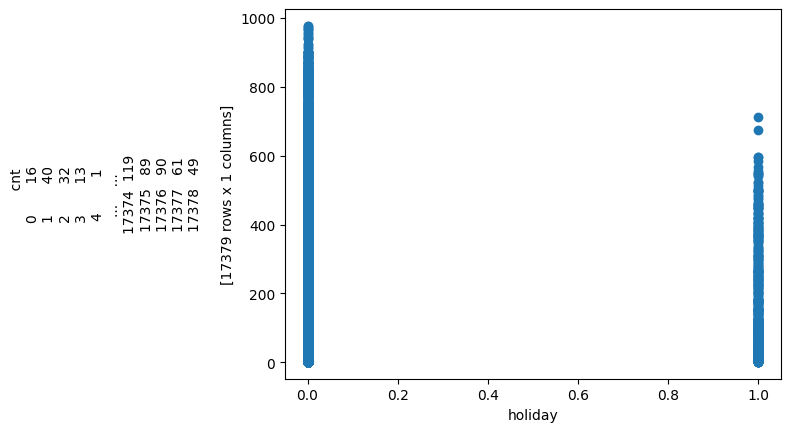

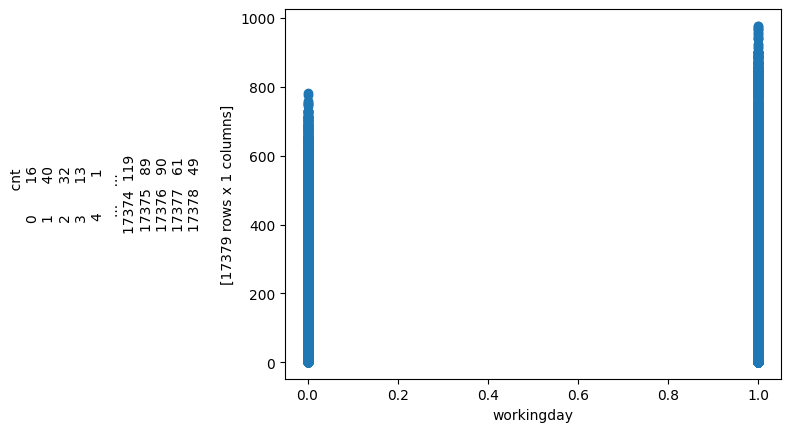

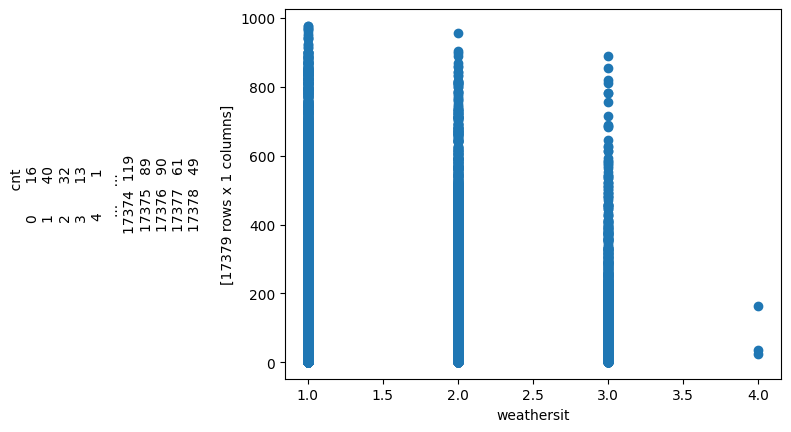

In [36]:
x_labels = ["atemp", "windspeed", "dteday", "season", "yr", "mnth", "hr", "holiday", "workingday", "weathersit"]
y_label = "cnt"
for a in x_labels:
  plt.scatter(x[a], y[y_label])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

I am going to attempt to learn the context of the problem better so that I can find the predictors that will actually affect bike rentals. Due to this, I am going to drop some of the worse predictors.

In [37]:
X = x.drop(columns=["hum", "dteday", "season", "yr", "weekday", "weathersit"])

In [38]:
x = torch.from_numpy(X.to_numpy()).type(torch.float)
y = torch.from_numpy(y.to_numpy()).type(torch.float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01)

In [39]:
model = nn.Linear(in_features=7, out_features=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [42]:
epochs = 500
for epoch in range(epochs):
  model.train()
  y_pred = model(x_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
      test_pred = model(x_test)
      test_loss = loss_fn(test_pred, y_test)

  if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 135328882688.00000, Test loss: 242055448100864.00000
Epoch: 50 | Train loss: nan, Test loss: nan
Epoch: 100 | Train loss: nan, Test loss: nan
Epoch: 150 | Train loss: nan, Test loss: nan
Epoch: 200 | Train loss: nan, Test loss: nan
Epoch: 250 | Train loss: nan, Test loss: nan
Epoch: 300 | Train loss: nan, Test loss: nan
Epoch: 350 | Train loss: nan, Test loss: nan
Epoch: 400 | Train loss: nan, Test loss: nan
Epoch: 450 | Train loss: nan, Test loss: nan


This model looks a little wonky due to the loss values stated above. Due to this I am going to add an additional layer to attempt to improve it. Thank you to Vince for this idea.

In [45]:
model_2 = nn.Sequential(
    nn.Linear(in_features=7, out_features=7),
    nn.Linear(in_features=7, out_features=1),
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [46]:
epochs = 500
for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(x_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
      test_pred = model_2(x_test)
      test_loss = loss_fn(test_pred, y_test)

  if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 50 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 100 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 150 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 200 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 250 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 300 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 350 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 400 | Train loss: 68897.32812, Test loss: 67519.89062
Epoch: 450 | Train loss: 68897.32812, Test loss: 67519.89062


I think that this model looks really good compared to the previous one. I will now generate a scatterplot based on this model.

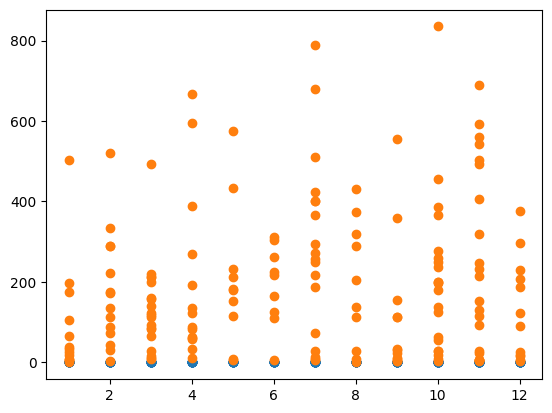

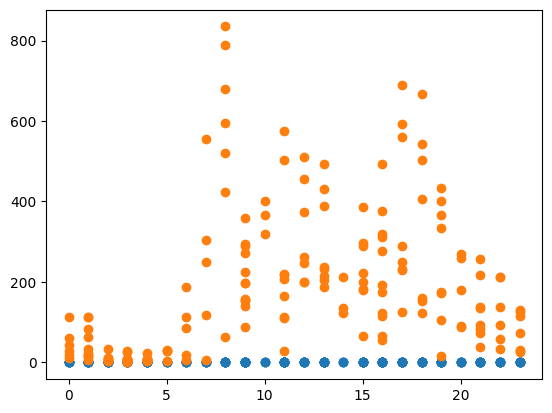

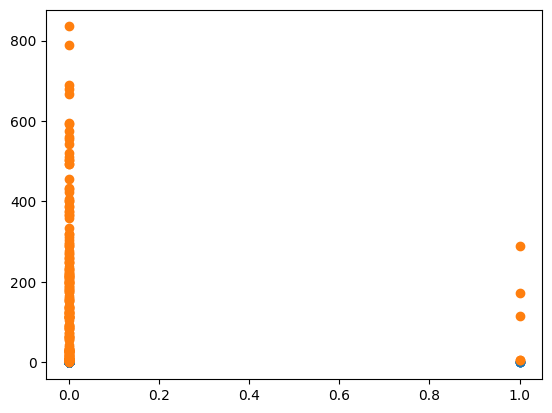

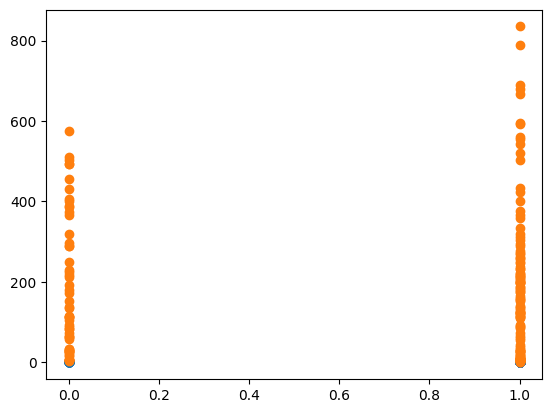

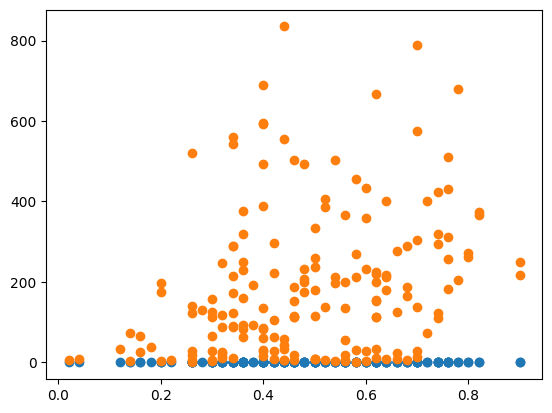

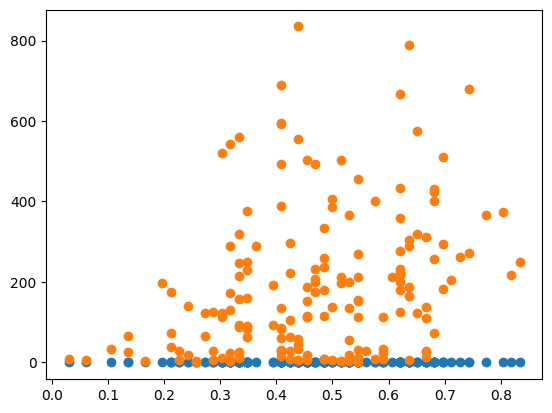

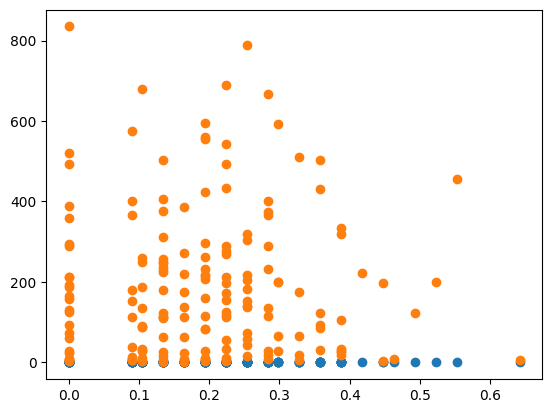

In [47]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(x_test)

plt.scatter(x_test.detach().numpy()[:, 0], y_preds.detach().numpy())
plt.scatter(x_test.detach().numpy()[:, 0], y_test)
plt.show()
plt.scatter(x_test.detach().numpy()[:, 1], y_preds.detach().numpy())
plt.scatter(x_test.detach().numpy()[:, 1], y_test)
plt.show()
plt.scatter(x_test.detach().numpy()[:, 2], y_preds.detach().numpy())
plt.scatter(x_test.detach().numpy()[:, 2], y_test)
plt.show()
plt.scatter(x_test.detach().numpy()[:, 3], y_preds.detach().numpy())
plt.scatter(x_test.detach().numpy()[:, 3], y_test)
plt.show()
plt.scatter(x_test.detach().numpy()[:, 4], y_preds.detach().numpy())
plt.scatter(x_test.detach().numpy()[:, 4], y_test)
plt.show()
plt.scatter(x_test.detach().numpy()[:, 5], y_preds.detach().numpy())
plt.scatter(x_test.detach().numpy()[:, 5], y_test)
plt.show()
plt.scatter(x_test.detach().numpy()[:, 6], y_preds.detach().numpy())
plt.scatter(x_test.detach().numpy()[:, 6], y_test)
plt.show()

These models show that even the best depictions of the data are not very good at predicting bike rental poularity. The Y axis shows the popularity of the rentals while the x axis shows the different predictors. I believe that these predictors alone don't do a good job of predicting because of their interdependence on one another. For instance, not many people are renting bikes at midnight even if the humidity is low and not many people will rent bikes at noon if it is raining severely. Because of this, the data has come to the conclusion that a different test would be beneficial to find the connections.